# Tianic Data Science
## Workflow stages

1. Quuestion or problem definition
2. Acquire training and testing data
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data
5. Model, predict and solve the problem
6. Visualize, report, present the problem solving steps and final solution.
7. Supply or sumt the results

## 1. Question and problem definition

- Knowing from a training set of samples listing passengers who survived or dit not survive the The Titanic disaster. can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not. 

The highlights to note for discribed on the Tianic dataset.
- On April 15, 1912, during her maiden voyage, the Titanic sank after collingding with an iceberg, killing 1502 out of 2224 passengers and crew Translated 32% survival rate.
- One of the reasons that the shipwreck lead to such loss life was that there were not enough lifeboats for the passengers and crew.

- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. 

### workflow goals

**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of diffenrent classes with our solution goal.

**correlation**. One can approach the problem based on vailable features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the features values change does the solution state change as well, and visa-versa? this can be tested both for numerical and categorical features in the fiven dataset. We may also want to determine correlation among features other than survival for subsequent qoals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numberic values. So for instance converting text categorical values to numeric values.

**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting**. We may also analyze the given training the dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results. 

**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals.


In [87]:
## import library
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data

In [88]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Analyze by descibing data

In [89]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [90]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are categorical ?**

There values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass

**Which features are numerical ?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
- Continous: Age, Fare, Discrete: SibSp, Parch.


**Which features are mixed data types ?**
Numerical, alphanumeric data within same feature. there are candidates for correcting goal.
- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos ?**
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and qoutes used for alternative or short names. 

**Which features contain blank, null or empty values ?**
These will require correcting.
- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features ?**
Helping us during converting goal.
- Seven features are integer or floats. Six in case of test dataset.
- five features are strigs (object).



In [91]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**What is the distribution of numericcal feature values across the samples ?**

This hepls us determine, among other early insights, how representative is the training dataset of the actual problem domain. 
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most Passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying a high as $512.
- Few elderly passengers (<1%) within are range 65-80.

In [92]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**What is the distribution of categorical features ?**
 - Name are unique across the dataset( count=quniqe=891)
 - Sex variable as two possibe values with 65% male(top = male, freq=577/count891).
 - Cabin values have several dupicates across samples. Alternatively several passengers several passengers shared a cabin.
 - Embarked takes three possible values. S port used by most passengers (top = S)
 - Ticket feature has high ratio (22%) of duplicate values (unique = 681)
 

In [93]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Assumtions based on data analysis
#### Correlating.
we want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations late in the project.
#### Completing.
    1. We may want to complete Age feature as it is definitely correlated to survival.
    2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature 
#### Correcting.
    1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation bettween Ticket and survival.
    2. Cabin feature may be dropped as it is highly incomplete or contains mayny null values both in training and test dataset.
    3. PassengerId may be dropped from training dataset as it does not contribute to survival.
    4. Name feature is relatively not-standard, may not contribute directly to survival, so may be dropped.
#### Creating.
    1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    2. We may want to engineer the Name feature to extract Title as a new feature. 
    3. We may want to create new feature for Age bands. 
    4. We may also want to create a Fare range feature if it helps our analysis
#### Classifying.
We may be also add to our assumptions based on the problem description noted earlier.

    1. Women (Sex = female) wre more likely to have survived.
    2. Children (Age< ?) were more likely to have survived.
    3. The upper-class passengers (Pclass = 1) were more likely to have survived.
    
### Analyze by pivoting features
to confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are cateorical (Sex) ordinal (Pclass) or discrete(SibSp, Parch) type.
- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this featues in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1)

In [94]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [95]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [96]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Correlating numerical features
Let us start by understanding correlation between numerical features and our solution goal (Survived).

A histogram chart is usefull for analyzing continous numerical variables like Age where banding our ranges will help idntify usefull patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer question relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualization represents the count of samples or passengers.
#### Observations.
    - Infants (Age <= 4) had high survival rate.
    - Oldest passengers (Age = 80) survived.
    - Large number of 15-25 year olds did not survive.
    - Most passengers are in 15-35 are range
#### Decisions.
This simple analysis confirms our assumptions as decision for subsequent workflow stages.
    - We should consider Age (Our assumption classifying #2) in our model training.
    - Complete the Age feature for null values (Completing #1)
    - We should band age groups (creating #3)

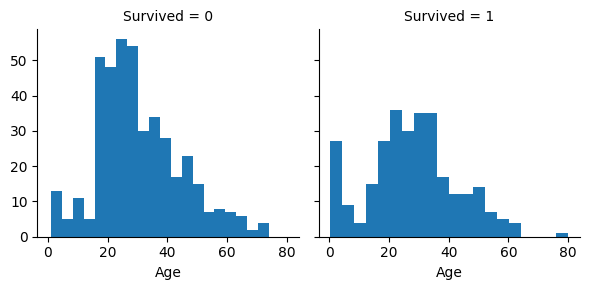

In [97]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Correlating numberical and ordinal features 
We can combine multiple features for identifying correlations using a single plot. this can be done with numerical and categorical features which have numeric values.
#### Observations.
    - Pclass = 3 had most Passengers, however most dit not survive. Confirms our classifying assumption. 
    - Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further quanlifies our classifying assumption.
    - Most passengers in Pclass = 1 survived. Confirms our classifying assumption
    - Pclass varies in terms of Age distribution of passengers.
#### Decisions.
    - Consider Pclass for model training.

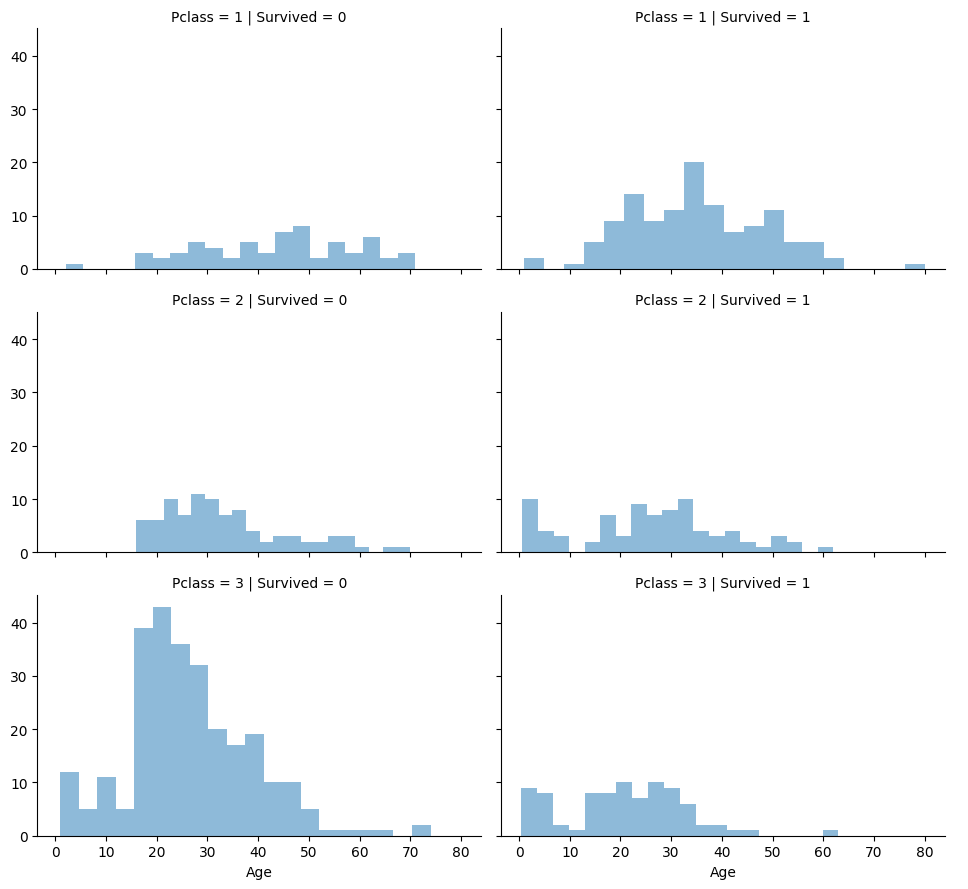

In [98]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins=20)
grid.add_legend()

#### Correlating categorical features
#### Observation.
    - Female passengers had much better survival rate than males.
    - Exception in Embarked=C where males has higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    - Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 
    - Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
#### Decisions.
    - Add Sex feature to model training
    - complete and add Embarked feature to model training.

c:\users\thuy nguyen\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\thuy nguyen\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


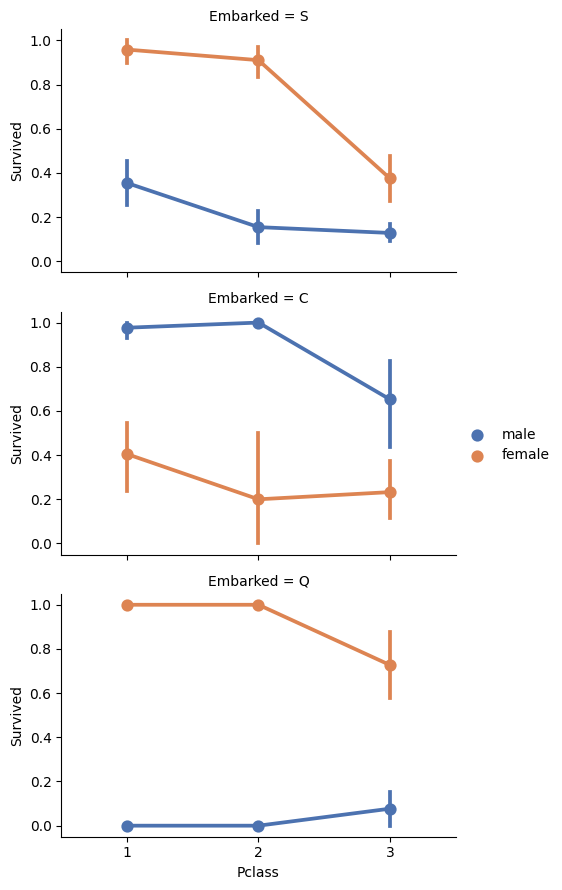

In [99]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numveric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numberic continuous), with Survived (Categorical numveric).
#### Observations.
    - Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.
    - Port of embarkation correlates with survival rates. Confirms correlating and completing.
#### Desicions.
    - Consider banding Fare feature.

c:\users\thuy nguyen\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


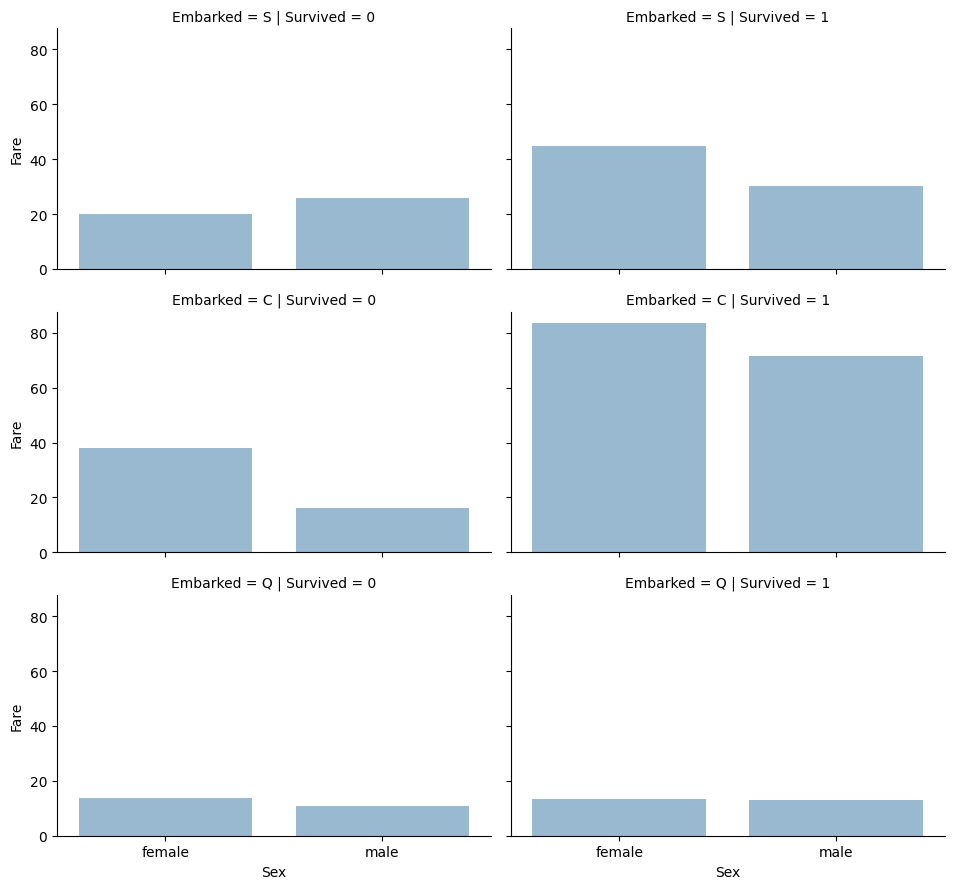

In [100]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci=None)
grid.add_legend()

### Wrangle data
We have collected several assumptions and decision regarding our dataset and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us nw execute our decision and assumptions for correcting, creating, and completing goals.
#### Correcting by dropping features
- Drop Cabin, Ticket

In [101]:
print('before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df  = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

print('after ', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after  (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extractin from existing

In the folowing code we extrict Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame
#### Observations
    - Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
    - Survival among Title Age bands varies sightly
    - Certain titles mostly survived (Mme, Lady, Sir) or dit not (Don, Rev, Jonkheer).
#### Decision. 
    - We decide to retain the new Title feature for model training.
    

In [102]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']) #  cross table

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare

In [103]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt','Col',
                                                'Don','Dr','Major','Rev','Sir','Jonkheer','Done'],'Rate')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rate,0.347826


We can convert the categorical titles to ordinal

In [104]:
title_mapping = {'Mr':1, 'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [105]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by model algorithms. Doning so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0

In [106]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.shape

(891, 9)

In [107]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


### Completing a numberical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.
    
    1. A simple way is to generate random numbers between mean and standard deviation
    2. More accurate way of guessing missing values is to use other correlated freatures. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1, and Gender=1, and so on..
    3. combine methods 1 and 2. So instead of guessing are values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations. 
Method 1 and 3 will introduce random noise into our models. the results from multiple executions might vary. We will prefer method 2.

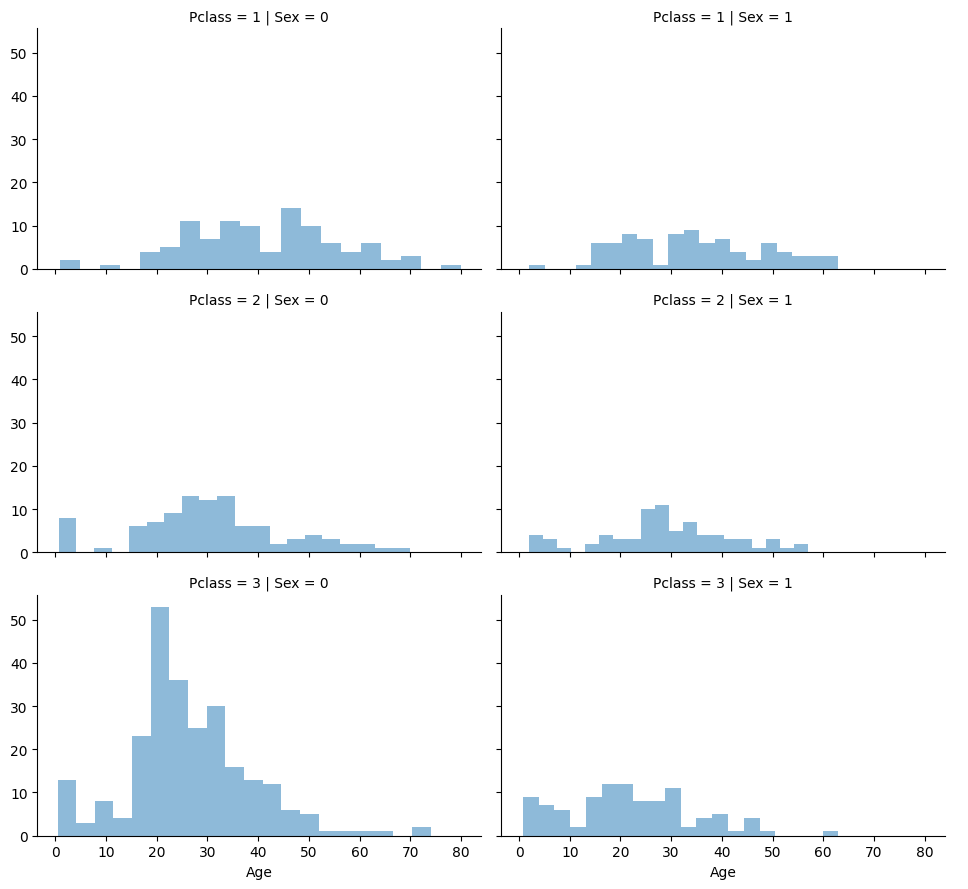

In [108]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [109]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass(1,2,3) to caculate guessed values of Age for the six combinations.

In [110]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df  = dataset[(dataset['Sex'] == i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) *0.5
    for i in range(0, 2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & ( dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


Let us create Age bands and determine correlations with Survived.

In [111]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [112]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age']=1
    dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age']=2
    dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age']=3
    dataset.loc[ (dataset['Age'] > 64), 'Age'] = 4
    

In [113]:
dataset['Age'].unique()

array([2, 3, 1, 0, 4])